In [51]:
from keras.layers import Dense, Input, Flatten, Rescaling, Conv2D, BatchNormalization, Dropout, MaxPool2D, Activation, MaxPooling2D, GlobalAveragePooling2D
from keras.models import Sequential
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import datetime
from tensorflow.keras import layers, models
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau,ModelCheckpoint
import tensorflow as tf
from keras.optimizers import Adam
from keras.callbacks import TensorBoard
from keras import backend as K
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split

In [25]:
!sudo apt install p7zip

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
p7zip is already the newest version (16.02+dfsg-8).
p7zip set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [26]:
!p7zip -d datasetCards.7z


7-Zip (a) [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.00GHz (50653),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 391599928 bytes (374 MiB)

Extracting archive: datasetCards.7z
--
Path = datasetCards.7z
Type = 7z
Physical Size = 391599928
Headers Size = 56906
Method = LZMA2:24
Solid = +
Blocks = 1

  0%      0% 163          1% 163 - datasetCards/14card types-14-(200 X 200)-94.61.h5                                                              2% 163 - datasetCards/14card types-14-(200 X 200)-94.61.h5                                                              3% 16

In [28]:
import os
dataset_dir = '/content/datasetCards'
train_dir = os.path.join(dataset_dir, 'train')
test_dir = os.path.join(dataset_dir, 'test')
valid_dir = os.path.join(dataset_dir, 'valid')

classes = os.listdir(train_dir)
print(f"Clases encontradas: {classes}")
print(f"Numero de clases: {len(classes)}")

for class_name in classes:
    print(f"{class_name}: {len(os.listdir(os.path.join(train_dir, class_name)))} imagenes")

Clases encontradas: ['jack of spades', 'seven of diamonds', 'king of hearts', 'nine of hearts', 'queen of hearts', 'three of diamonds', 'queen of diamonds', 'six of hearts', 'queen of clubs', 'four of hearts', 'ten of hearts', 'ace of hearts', 'two of diamonds', 'king of diamonds', 'two of clubs', 'six of diamonds', 'six of spades', 'four of clubs', 'joker', 'nine of diamonds', 'jack of clubs', 'ace of clubs', 'ten of spades', 'ten of clubs', 'eight of spades', 'three of spades', 'nine of spades', 'seven of clubs', 'two of hearts', 'king of spades', 'three of hearts', 'five of hearts', 'seven of spades', 'three of clubs', 'ace of spades', 'jack of hearts', 'five of spades', 'four of diamonds', 'king of clubs', 'seven of hearts', 'six of clubs', 'eight of diamonds', 'four of spades', 'two of spades', 'five of clubs', 'ace of diamonds', 'nine of clubs', 'eight of hearts', 'queen of spades', 'five of diamonds', 'ten of diamonds', 'eight of clubs', 'jack of diamonds']
Numero de clases: 53


In [29]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    image_size=(64, 64),
    batch_size=32,
    label_mode='categorical'
)

test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=(64, 64),
    batch_size=32,
    label_mode='categorical'
)

valid_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    valid_dir,
    image_size=(64, 64),
    batch_size=32,
    label_mode='categorical'
)

Found 7624 files belonging to 53 classes.
Found 265 files belonging to 53 classes.
Found 265 files belonging to 53 classes.


In [30]:
def preprocess(image, label):
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

train_dataset = train_dataset.map(preprocess)
test_dataset = test_dataset.map(preprocess)
valid_dataset = valid_dataset.map(preprocess)

In [61]:
cnn = Sequential([
  Conv2D(32, kernel_size=(3, 3), input_shape=(64, 64, 3), padding='same'),
  BatchNormalization(),
  Activation('relu'),
  MaxPooling2D(pool_size=(3,3), strides=2, padding='valid'),

  Conv2D(32, kernel_size=(3, 3), padding='same'),
  BatchNormalization(),
  Activation('relu'),
  MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'),

  Conv2D(64, kernel_size=(3, 3), padding='same'),
  BatchNormalization(),
  Activation('relu'),
  MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'),

  Flatten(),

  Dense(256, activation='relu'),
  Dense(128, activation='relu'),
  Dense(53, activation='softmax')
])

In [63]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [64]:
cnn.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)                   │ (None, 64, 64, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_16               │ (None, 64, 64, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_16 (Activation)           │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 31, 31, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_17               │ (None, 31, 31, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_17 (Activation)           │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 15, 15, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_18               │ (None, 15, 15, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_18 (Activation)           │ (None, 15, 15, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 256)                 │         803,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 53)                  │           6,837 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 871,957 (3.33 MB)

 Trainable params: 871,701 (3.33 MB)

 Non-trainable params: 256 (1.00 KB)

In [65]:
cnn_fit=cnn.fit(train_dataset, epochs=10, validation_data=(valid_dataset))

Epoch 1/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 0.1801 - loss: 3.2676 - val_accuracy: 0.1585 - val_loss: 3.0850
Epoch 2/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.4341 - loss: 1.9388 - val_accuracy: 0.5925 - val_loss: 1.4591
Epoch 3/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.6006 - loss: 1.4465 - val_accuracy: 0.7396 - val_loss: 1.0036
Epoch 4/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.7012 - loss: 1.0938 - val_accuracy: 0.7321 - val_loss: 0.9215
Epoch 5/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.7523 - loss: 0.8732 - val_accuracy: 0.7698 - val_loss: 0.8599
Epoch 6/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7993 - loss: 0.6887 - val_accuracy: 0.7887 - val_loss: 0.8073
Epoch 7/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.8403 - loss: 0.5215 - val_accuracy: 0.8113 - val_loss: 0.8877
Epoch 8/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.8703 - loss: 0.4156 - val_ac

In [67]:
history = cnn_fit.history

training_loss = history['loss']
validation_loss = history['val_loss']

training_accuracy = history['accuracy']
validation_accuracy = history['val_accuracy']


print("Training Loss:", training_loss)
print("Validation Loss:", validation_loss)
print("Training Accuracy:", training_accuracy)
print("Validation Accuracy:", validation_accuracy)

Training Loss: [2.715599298477173, 1.7931572198867798, 1.3245513439178467, 1.031895637512207, 0.8304746150970459, 0.6411454081535339, 0.4992060363292694, 0.3855496346950531, 0.27961719036102295, 0.23747126758098602]
Validation Loss: [3.0850353240966797, 1.4590986967086792, 1.0036325454711914, 0.9215102195739746, 0.8598530292510986, 0.8073277473449707, 0.8877474069595337, 0.7886525392532349, 0.7682687640190125, 0.8121755719184875]
Training Accuracy: [0.2628541588783264, 0.4863588809967041, 0.6306400895118713, 0.712224543094635, 0.759181559085846, 0.8144018650054932, 0.846930742263794, 0.8847061991691589, 0.9176285266876221, 0.9249737858772278]
Validation Accuracy: [0.15849056839942932, 0.5924528241157532, 0.7396226525306702, 0.7320754528045654, 0.7698113322257996, 0.7886792421340942, 0.8113207817077637, 0.8037735819816589, 0.849056601524353, 0.8226414918899536]


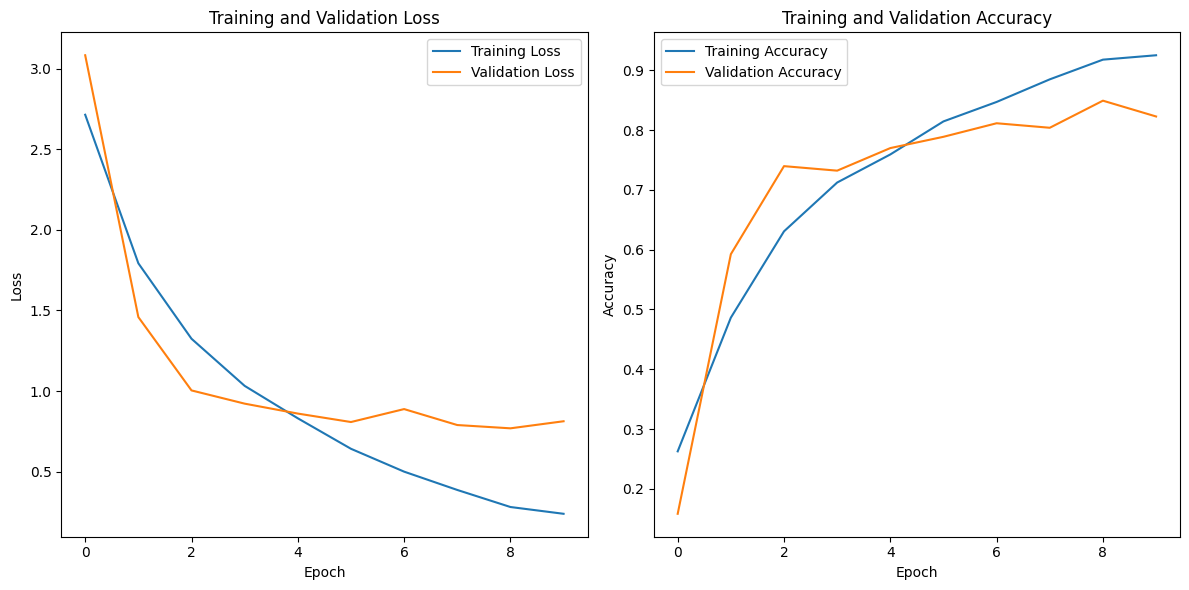

In [68]:
# Plotting the Loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plotting the Accuracy
plt.subplot(1, 2, 2)
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [66]:
def dataset_to_numpy(dataset):
    images, labels = [], []
    for image_batch, label_batch in dataset:
        images.append(image_batch.numpy())
        labels.append(label_batch.numpy())

    return np.concatenate(images), np.concatenate(labels)

X_test, y_test = dataset_to_numpy(test_dataset)
test_loss, test_acc = cnn.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc * 100:.2f}%")

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7751 - loss: 1.0008  
Test accuracy: 78.87%
